## EE460J-Lab 2 | September 11, 20
### Can Gokalp (cg39283) | Priyadarshan Patil (pp22352)

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

sns.set(style="white", color_codes=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Programming Questions

## Problem 1

In [3]:
df1 = pd.read_csv('Lab2_Data/DF1')
df1.head(5)

,Unnamed: 0,0,1,2,3
0,0,1.038502,0.899865,0.835053,-0.971528
1,1,0.320455,-0.647459,0.149079,0.352593
2,2,0.055480,2.234771,0.271672,-2.108739
3,3,-0.007260,-0.524299,-0.126550,0.670827
4,4,-1.237390,-1.377017,-1.049932,1.342079


In [4]:
df1.drop(columns='Unnamed: 0', inplace=True)

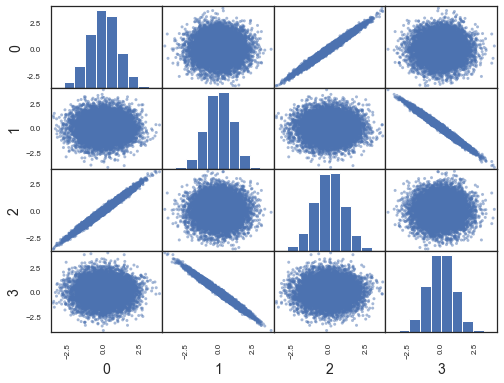

In [5]:
pd.plotting.scatter_matrix(df1, figsize=(8,6));

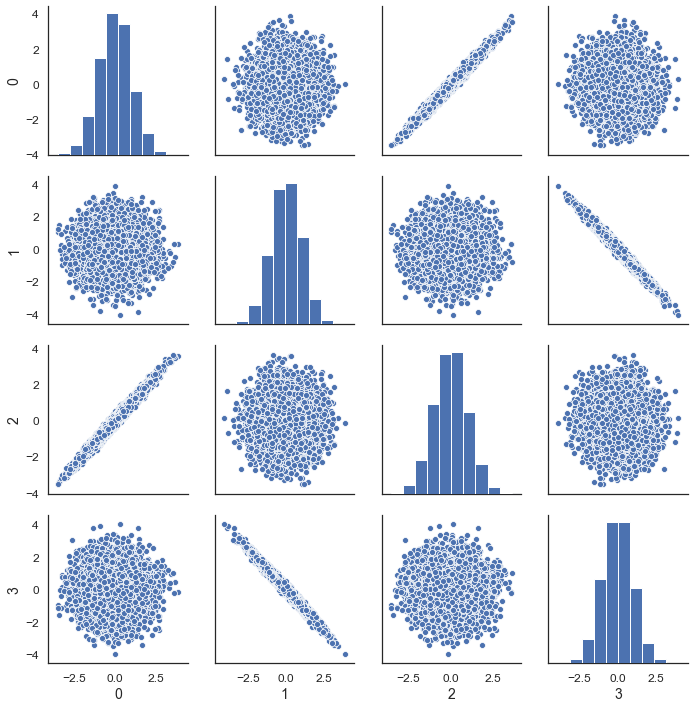

In [6]:
sns.pairplot(df1);

correlated columns: 0-2, 1-3

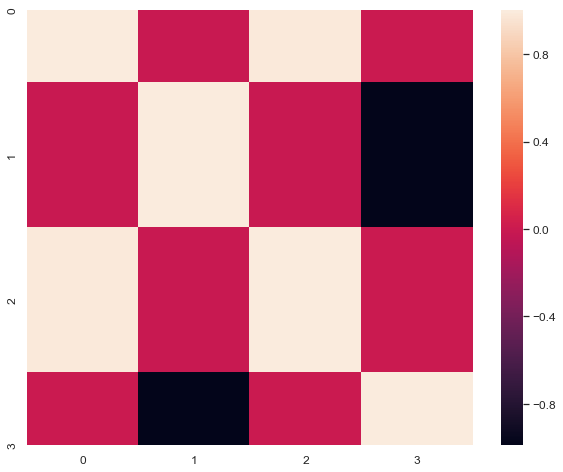

In [7]:
corr = df1.corr()

# plot the heatmap
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [8]:
df1_mat = df1.to_numpy()
num_samples = df1.shape[0]
mean = df1_mat.sum(axis=0, keepdims=True)/num_samples
cent = df1_mat - mean
cov = (1.0/(num_samples-1))*np.dot(cent.T, cent)
print('mean: {} \n\n cov: {} \n\n numpy_cov: {}'.format(mean, cov, np.cov(df1_mat, rowvar=False)))

mean: [[ 0.00770425  0.00931349  0.00758574 -0.00845458]] 

 cov: [[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]] 

 numpy_cov: [[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


They match since essentially covariance divided by the standard deviations. And so this also shows the correlation except its just harder to interpret as two different variable could be in different scales.

In [9]:
mean = np.array([0,0,0])
cov = np.matrix([[20, 0, 0],[0, 40, 10],[0, 10, 30]])

ci = 1
cj = 2

def sample(num_samples):
    mvn = np.random.multivariate_normal(mean, cov, num_samples)
    return mvn

est_cov_arr = []
for num_samples in np.linspace(100,10000,num=1000):
    mvn = sample(int(num_samples))
    est_mean = mvn.sum(axis=0, keepdims=True)/num_samples
    cent = mvn - est_mean
    est_cov = (1.0/(num_samples-1))*np.dot(cent.T, cent)
#     print('mean: {} \n\n cov: {}'.format(est_mean, est_cov))
    est_cov_arr.append(est_cov[ci, cj])

In [10]:
cov_arr = [cov[ci, cj]]*len(est_cov_arr)

Text(0, 0.5, 'Estimate')

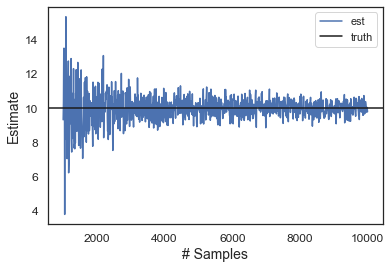

In [12]:
plt.plot(np.linspace(1000,10000,num=1000), est_cov_arr, label='est')
plt.axhline(10, 0, 5000, color='k', label='truth')
# plt.plot(np.linspace(1000,10000,num=1000), cov_arr, label='truth')
plt.legend()
plt.xlabel('# Samples')
plt.ylabel('Estimate')

# Problem 2

In [12]:
df2 = pd.read_csv('Lab2_Data/DF2')
df2.head(5)

,Unnamed: 0,0,1
0,0,1.038502,0.835053
1,1,0.320455,0.149079
2,2,0.055480,0.271672
3,3,-0.007260,-0.126550
4,4,-1.237390,-1.049932


In [13]:
df2.drop(columns='Unnamed: 0', inplace=True)

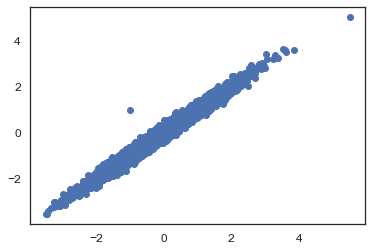

In [14]:
plt.scatter(df2['0'].to_numpy(), df2['1'].to_numpy());

Lets look at the covariance matrix to see the variance of the features and the cross feature covariances.

In [15]:
Z = df2.to_numpy()
Z_cov = np.cov(Z, rowvar=False)
print('covariance of features: \n {}'.format(Z_cov))

covariance of features: 
 [[1.00464777 0.9942424 ]
 [0.9942424  1.00415964]]


We would like to find the directions of the larger spread of data, and values representing the magnitude -- which are the eigenvectors and eigenvalues. If we apply some linear transformation to matrix M (m by m); $Mv_1 = b_1$ we will obtain (m by 1) vector $b_1$. If we select the vector $v_1$ such that after the transformation the length is changed but not the driection $Mv_1 = \lambda v_1$, this vector is called the eigenvector and the $\lambda$ represents the magnitude/eigenvalue (indicating the magnitude of the spread in the direction of the corresponding eigenvector). Lets consider the covariance matrix and find the directions of the spread of the data. 

In [16]:
e_val, e_vec = np.linalg.eig(Z_cov)
print('eigen_values: {}, \n eigen_vectors: \n {}'.format(e_val, e_vec))

eigen_values: [1.99864613 0.01016127], 
 eigen_vectors: 
 [[ 0.70719357 -0.70701999]
 [ 0.70701999  0.70719357]]


Looking at the eigenvalues we see that much of the variation is along the first eigenvector: [0.707, 0.707] and tiny variation along the second eigenvector. These two vectors are orthogonal to each other - they define a new space. We can project the data points onto this new space.

In [17]:
projected = Z@e_vec

And now we can plot the transformed data points

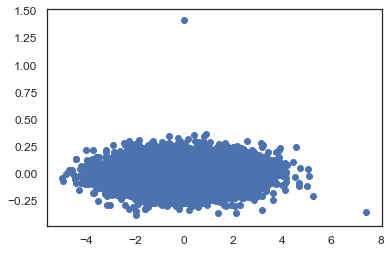

In [18]:
plt.scatter(projected[:,0], projected[:,1])

In this scatter plot we can see that the first data point is more outlying then the second. The spread along that direction is small and so that point looks farther out.

# Problem 3

0.03216849340899336


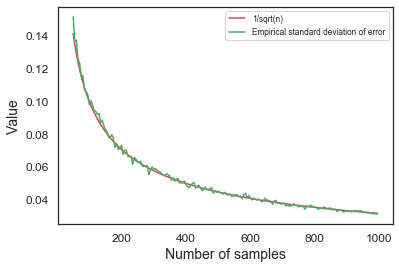

In [26]:
n_obs = 150
mu_x, sigma_x = 0, 1
mu_e, sigma_e = 0, 1
beta_0, beta_1 = -3, 0

k=1000
err_arr=[]

for i in range(k):
    Obs_x = np.random.normal(mu_x, sigma_x, n_obs)
    Obs_e = np.random.normal(mu_e, sigma_e, n_obs)

    Obs_y = ([beta_0]*n_obs) + (Obs_x * beta_1) + Obs_e
    Obs_x_reshape = Obs_x.reshape((-1, 1))

    model = LinearRegression(fit_intercept=True).fit(Obs_x_reshape, Obs_y)
    beta_est =  model.coef_[0]
    #print(model.intercept_)
    #print(model.coef_)
    err_arr.append(beta_est-beta_1)
#e_stdev = np.std(Obs_e)
#print("The error is: ",e_stdev/np.sqrt(n_obs))

std = np.std(err_arr)
mean = np.mean(err_arr)
import scipy.stats as st
print(st.norm.cdf((-0.15 - mean)/std))
alpha = 0.1

beta = []
e_stdev_array = []
sqrt_array = []
for n_obs in np.arange(50, 1000, 5):
    err_arr=[]
    for i in range(k):
        Obs_x = np.random.normal(mu_x, sigma_x, n_obs)
        Obs_e = np.random.normal(mu_e, sigma_e, n_obs)

        Obs_y = ([beta_0]*n_obs) + (Obs_x * beta_1) + Obs_e
        Obs_x_reshape = Obs_x.reshape((-1, 1))

        model = LinearRegression(fit_intercept=True).fit(Obs_x_reshape, Obs_y)
        beta_est =  model.coef_[0]
        #print(model.intercept_)
        #print(model.coef_)
        beta_hat = -0.15
        e_stdev = beta_est-beta_1
        err_arr.append(e_stdev)
    e_stdev_array.append(np.std(err_arr))
    sqrt_array.append(1/np.sqrt(n_obs))
    #print("The error is: ",e_stdev/np.sqrt(n_obs))
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of samples') 
ax.set_ylabel('Value')
# set the xlim
dim = np.arange(50, 1000, 5)
actual_stdev = [1]*200
#ax.plot(dim, beta,  "b", label="Estimated beta")
ax.plot(dim, sqrt_array, "r", label="1/sqrt(n)") 
ax.plot(dim, e_stdev_array, "g", label="Empirical standard deviation of error")
#ax.plot(dim, actual_stdev, "c", label="Actual standard deviation of error") 

legend = ax.legend(loc='best', shadow=False, fontsize='small')
plt.show()

# Problem 4

In [149]:
folder_path = 'Names'

def get_file(year=1880):
    year = str(year)
    text_file = os.path.join(folder_path, 'yob' + year + '.txt')
    df = pd.read_csv(text_file, header=None)
    df.rename(columns = {0:'Name', 1:'Sex', 2:'Freq'}, inplace=True)
    return df 

In [150]:
df = get_file(1880)

In [151]:
df.head(5)

,Name,Sex,Freq
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [152]:
df.sort_values(by='Freq', ascending=False)

,Name,Sex,Freq
942,John,M,9655
943,William,M,9531
0,Mary,F,7065
944,James,M,5927
945,Charles,M,5348
...,...,...,...
926,Sannie,F,5
927,Selena,F,5
928,Sibyl,F,5
929,Tella,F,5


In [153]:
def topk(k=5, year=1880):
    df = get_file(year)
    df_grouped = df.groupby('Name').sum()
    return df_grouped.sort_values(by='Freq', ascending=False).reset_index().loc[:k-1, 'Name'].values

In [154]:
print('top k names: {}'.format(topk()))

top k names: ['John' 'William' 'Mary' 'James' 'Charles']


In [155]:
def name_freq(name='John', all_years=True, years=list(np.arange(1880,2016,1))):
    frames = []
    if not isinstance(years,list):
        years = [years]
    for year in years:
        df = get_file(year)
        cur_df = df[df['Name']==name]
        cur_df['Year'] = year
        cur_df['Rel_Freq'] = df['Freq']/df['Freq'].sum()
        cur_df['Pop'] = df['Freq']/df['Freq'].sum()
        frames.append(cur_df)
        yearly_freq = pd.concat(frames)
        yearly_freq.reset_index(drop=True,inplace=True)
    if all_years:
        grouped_freq = yearly_freq.groupby(['Name', 'Sex'], as_index=False).sum()[['Name','Sex','Freq', 'Rel_Freq']]
        return grouped_freq
    
    return yearly_freq

In [156]:
name_freq(name='Mary', all_years=True)

,Name,Sex,Freq,Rel_Freq
0,Mary,F,4118058,2.628612
1,Mary,M,15158,0.010125


In [157]:
frames = []
years = np.arange(1880, 2016, 1)
for year in years:
    df = get_file(year)
    df.groupby(['Sex','Name']).sum()
    df['MF_diff'] = df.sort_values(['Sex','Name','Freq']).groupby(['Name'])['Freq'].diff()
    df['Year'] = year
    df.dropna(inplace=True)
    
    frames.append(df)
yearly_freq = pd.concat(frames)
yearly_freq.reset_index(drop=True,inplace=True)

In [158]:
unique_names = yearly_freq['Name'].unique()
out = open("names.txt", "w")


for name in unique_names:
    mf_diff = yearly_freq[yearly_freq['Name']==name]['MF_diff'].to_numpy()
    num_flips = ((np.diff(np.sign(mf_diff)) != 0)*1).sum()
    if num_flips > 0:
        out.write(name)
        out.write('\n')
        print(name)
out.close()

Marion
Jessie
Sidney
Leslie
Alva
Ollie
Allie
Lynn
Jimmie
Dee
Merle
Dell
Fay
Tommie
Lou
Carey
Augustine
Clair
Jean
Shirley
Freddie
Lacy
Ossie
Theo
Bird
Alpha
Erie
Oda
Sammie
Vernie
Artie
Augusta
Cleo
Jewel
Johnie
Byrd
Ocie
Guadalupe
Lue
Odie
Lonie
Mannie
Dana
Gene
Cary
Gail
Olie
Lennie
Claudie
Donnie
Ottie
Verne
Elza
Arlie
Bee
Orrie
Orie
Jodie
Tracy
Osie
Golden
Valentine
Love
Laverne
Courtney
Rene
Rennie
Billie
Pleasant
Sydney
Oral
Hollie
Jule
Gay
Laurie
Montie
Patsy
Otha
Ivory
Laurel
Alvie
Woodie
Earlie
Lorenza
Dennie
Maxie
Kay
Santos
Vannie
Aubrey
Carlie
Mell
Ernie
Garnet
Odell
Genie
Unknown
Garnett
Pearley
Robbie
Avery
Bernie
Shellie
Arley
Beryl
Elvie
Linnie
Roe
Wallie
Ivey
Jonnie
Murl
Zollie
Monte
Rossie
Stacy
Quincy
Audie
Clemmie
Elba
Lemmie
Ludie
Mallie
Beverly
Gale
Dannie
Lexie
Ara
Christie
Clemence
Willia
Vester
Gillie
Oma
Ova
Arie
Carry
Davie
Hollis
Lannie
Toy
Algie
Elgie
Macy
Meredith
Merl
Vere
Offie
Dossie
Holly
Jamie
Myrl
Perle
Alvia
Rue
Pat
Frankie
Onnie
Lavern
Onie
Vernal


In [159]:
# df_orig = get_file(1880)
# df = df_orig.copy()
# df.groupby(['Sex','Name']).sum()
# df['mf_diff'] = df.sort_values(['Sex','Name','Freq']).groupby(['Name'])['Freq'].diff()
# df.dropna()